In [1]:
import tools as tools


# Standard imports 
import numpy as np
import pandas as pd
import geopandas as gpd

from toolz import curry

# Plotting 
import matplotlib.pyplot as plt 

plt.style.use('seaborn-whitegrid')
%matplotlib inline

# # plt.rc('font', size=10)             # controls default text sizes
# plt.rc('axes', titlesize=18)        # fontsize of the axes title
# plt.rc('axes', labelsize=18)        # fontsize of the x and y labels
# plt.rc('xtick', labelsize=18)       # fontsize of the tick labels
# plt.rc('ytick', labelsize=18)       # fontsize of the tick labels
# plt.rc('legend', fontsize=14)       # legend fontsize
# plt.rc('figure', titlesize=20)      # fontsize of the figure title

plt.rcParams['figure.figsize'] = 11, 6 # set default size of plots

# Filter warnings 
pd.options.mode.chained_assignment = None
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

C:\Users\JBH\AppData\Local\Temp\ipykernel_16116\1658031426.py:7: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
C:\Users\JBH\AppData\Local\Temp\ipykernel_16116\1658031426.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped 

Header (state non-commercial/academic intentions)

In [2]:
header = {'name' : 'Jørgen Baun Høst',          'email' : 'pjz633@econ.ku.dk',
          'intention': 'Scrape Boliga for academic purposes'}

In [3]:
df=pd.read_parquet('data/boliga.pq')
df=df.sort_values('soldDate')
df['guid']=df['guid'].str.lower()
df['price_1000']=df['price']/1000
df=df[(df['year']>=2000) & (df['year']<=2010)]
df=df.reset_index(drop=True)
df['time_6m']=pd.PeriodIndex(df['soldDate'], freq='2Q')
df


,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,city,groupKey,canGetVR,bfEnr,year,month,week,time_q,price_1000,time_6m
0,0,Højkolvej 36,8210,1495000,2000-01-01 23:00:00+00:00,1,Alm. Salg,8542.8570,4.0,175,...,Aarhus V,NaN,True,4220221,2000,1,5,2000Q1,1495.000,2000Q1
1,0,Borthigsgade 26,6000,564680,2000-01-01 23:00:00+00:00,1,Alm. Salg,4826.3247,3.0,117,...,Kolding,NaN,True,5679177,2000,1,5,2000Q1,564.680,2000Q1
2,0,Horsekilden 17,4000,1251000,2000-01-01 23:00:00+00:00,1,Alm. Salg,10170.7310,4.0,123,...,Roskilde,NaN,True,1304154,2000,1,5,2000Q1,1251.000,2000Q1
3,0,Skovbakkevej 99,8800,370000,2000-01-01 23:00:00+00:00,1,Alm. Salg,2356.6880,6.0,157,...,Viborg,NaN,True,8459754,2000,1,5,2000Q1,370.000,2000Q1
4,0,Præstebakken 15,2610,1458444,2000-01-01 23:00:00+00:00,1,Alm. Salg,7596.0625,7.0,192,...,Rødovre,NaN,True,2041293,2000,1,5,2000Q1,1458.444,2000Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502012,0,Lillevangsvej 6,4174,1500000,2010-12-31 23:00:00+00:00,1,Alm. Salg,12000.0000,5.0,125,...,Jystrup Midtsj,NaN,True,2496794,2010,12,4,2010Q4,1500.000,2010Q4
502013,0,Ludvig Holsteins Alle 17,2750,1675000,2010-12-31 23:00:00+00:00,1,Alm. Salg,10029.9400,5.0,147,...,Ballerup,NaN,True,2108731,2010,12,4,2010Q4,1675.000,2010Q4
502014,0,Østerbyvej 9,9990,3000000,2010-12-31 23:00:00+00:00,1,Alm. Salg,15873.0160,6.0,189,...,Skagen,NaN,True,5530559,2010,12,4,2010Q4,3000.000,2010Q4
502015,526788,Engparken 37,6740,1125000,2010-12-31 23:00:00+00:00,1,Alm. Salg,10416.6670,4.0,108,...,Bramming,NaN,True,5047083,2010,12,4,2010Q4,1125.000,2010Q4


In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,groupKey,canGetVR,bfEnr,year,month,week,time_q,price_1000,time_6m,geometry
0,0,Højkolvej 36,8210,1495000,2000-01-01 23:00:00+00:00,1,Alm. Salg,8542.8570,4.0,175,...,NaN,True,4220221,2000,1,5,2000Q1,1495.000,2000Q1,POINT (10.16913 56.16901)
1,0,Borthigsgade 26,6000,564680,2000-01-01 23:00:00+00:00,1,Alm. Salg,4826.3247,3.0,117,...,NaN,True,5679177,2000,1,5,2000Q1,564.680,2000Q1,POINT (9.47292 55.48263)
2,0,Horsekilden 17,4000,1251000,2000-01-01 23:00:00+00:00,1,Alm. Salg,10170.7310,4.0,123,...,NaN,True,1304154,2000,1,5,2000Q1,1251.000,2000Q1,POINT (12.02684 55.63139)
3,0,Skovbakkevej 99,8800,370000,2000-01-01 23:00:00+00:00,1,Alm. Salg,2356.6880,6.0,157,...,NaN,True,8459754,2000,1,5,2000Q1,370.000,2000Q1,POINT (9.43825 56.47037)
4,0,Præstebakken 15,2610,1458444,2000-01-01 23:00:00+00:00,1,Alm. Salg,7596.0625,7.0,192,...,NaN,True,2041293,2000,1,5,2000Q1,1458.444,2000Q1,POINT (12.46182 55.67929)


In [5]:
kommune_2006 = gpd.read_file('data/kommune_2006.shp')
kommune_2006

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry
0,24842.0,Københavns Kommune,120727.0,2002-12-31,2006-12-31,64.0,Kommune,154225.005507,9.028113e+07,"MULTIPOLYGON Z (((12.73424 55.70328 0.00000, 1..."
1,24843.0,Frederiksberg Kommune,120728.0,1970-04-01,2006-12-31,64.0,Kommune,13520.324243,8.709197e+06,"POLYGON Z ((12.53736 55.69661 0.00000, 12.5370..."
2,46149.0,Birkerød Kommune,120748.0,1974-01-04,2006-12-31,64.0,Kommune,35777.227097,3.366869e+07,"POLYGON Z ((12.45040 55.81888 0.00000, 12.4473..."
3,46165.0,Græsted-Gilleleje Kommune,120753.0,1972-10-01,2006-12-31,64.0,Kommune,67562.933801,1.341441e+08,"POLYGON Z ((12.39490 56.03226 0.00000, 12.3952..."
4,46190.0,Jægerspris Kommune,120759.0,1975-01-01,2006-12-31,64.0,Kommune,84485.880031,9.514108e+07,"MULTIPOLYGON Z (((11.92257 55.90000 0.00000, 1..."
...,...,...,...,...,...,...,...,...,...,...
266,46773.0,Thyborøn-Harboøre Kommune,120920.0,2002-12-31,2006-12-31,64.0,Kommune,95733.805758,3.953641e+07,"MULTIPOLYGON Z (((8.18948 56.59492 0.00000, 8...."
267,46789.0,Vinderup Kommune,120925.0,2002-12-31,2006-12-31,64.0,Kommune,109305.320681,2.175008e+08,"MULTIPOLYGON Z (((8.85937 56.39892 0.00000, 8...."
268,46793.0,Åskov Kommune,120926.0,2001-12-31,2006-12-31,64.0,Kommune,77105.236905,2.388402e+08,"POLYGON Z ((8.86526 55.89540 0.00000, 8.86505 ..."
269,46804.0,Galten Kommune,120928.0,2001-12-31,2006-12-31,64.0,Kommune,54492.128242,7.268604e+07,"POLYGON Z ((9.95809 56.13030 0.00000, 9.96044 ..."


In [6]:
regioner=gpd.read_file('data/regioner.shp')
regioner

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry
0,105612.0,Region Hovedstaden,118711.0,2007-01-01,9999-12-31,66.0,Region,7.371152e+05,2.563160e+09,"MULTIPOLYGON Z (((15.19733 55.31846 0.00000, 1..."
1,105615.0,Region Sjælland,118712.0,2011-11-27,9999-12-31,66.0,Region,2.196684e+06,7.216493e+09,"MULTIPOLYGON Z (((12.54857 54.95316 0.00000, 1..."
2,105616.0,Region Syddanmark,118713.0,2007-01-01,9999-12-31,66.0,Region,2.436420e+06,1.209603e+10,"MULTIPOLYGON Z (((10.68129 54.72772 0.00000, 1..."
3,105620.0,Region Midtjylland,118715.0,2011-01-01,9999-12-31,66.0,Region,2.564054e+06,1.299856e+10,"MULTIPOLYGON Z (((11.67150 56.73861 0.00000, 1..."
4,105617.0,Region Nordjylland,118714.0,2007-01-01,9999-12-31,66.0,Region,1.697705e+06,7.870127e+09,"MULTIPOLYGON Z (((10.98412 57.21880 0.00000, 1..."


In [7]:
gdf_merge=gpd.sjoin(gdf, kommune_2006, predicate='within')
cols_to_drop=['index_right',
 'objectid',
 'navn',
 'enhedid',
 'fra',
 'til',
 'enhedtype',
 'art',
 'SHAPE_Leng',
 'SHAPE_Area']
gdf_merge['kommune_old']=gdf_merge['navn']
gdf_merge=gdf_merge.drop(columns=cols_to_drop)
gdf_merge=gpd.sjoin(gdf_merge, regioner, predicate='within')
gdf_merge['region']=gdf_merge['navn']
gdf_merge=gdf_merge.drop(columns=cols_to_drop)
gdf_merge

C:\Users\JBH\AppData\Local\Temp\ipykernel_16116\4171787026.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_merge=gpd.sjoin(gdf, kommune_2006, predicate='within')
C:\Users\JBH\AppData\Local\Temp\ipykernel_16116\4171787026.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_merge=gpd.sjoin(gdf_merge, regioner, predicate='within')


,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,bfEnr,year,month,week,time_q,price_1000,time_6m,geometry,kommune_old,region
0,0,Højkolvej 36,8210,1495000,2000-01-01 23:00:00+00:00,1,Alm. Salg,8542.8570,4.0,175,...,4220221,2000,1,5,2000Q1,1495.00,2000Q1,POINT (10.16913 56.16901),Århus Kommune,Region Midtjylland
23,0,Byløkken 32,8240,1887740,2000-01-01 23:00:00+00:00,1,Alm. Salg,10372.1980,6.0,182,...,4230330,2000,1,5,2000Q1,1887.74,2000Q1,POINT (10.22040 56.20569),Århus Kommune,Region Midtjylland
32,0,Gertrud Rasks Vej 2,8200,1576500,2000-01-02 23:00:00+00:00,1,Alm. Salg,9219.2980,6.0,171,...,5629660,2000,1,6,2000Q1,1576.50,2000Q1,POINT (10.21504 56.17655),Århus Kommune,Region Midtjylland
39,0,Bjørnshøjvej 2K,8380,875000,2000-01-02 23:00:00+00:00,1,Alm. Salg,7812.5000,4.0,112,...,4209569,2000,1,6,2000Q1,875.00,2000Q1,POINT (10.15009 56.25355),Århus Kommune,Region Midtjylland
42,0,Skæring Havvej 31,8250,1566000,2000-01-02 23:00:00+00:00,1,Alm. Salg,7492.8228,6.0,209,...,4144887,2000,1,6,2000Q1,1566.00,2000Q1,POINT (10.30097 56.23074),Århus Kommune,Region Midtjylland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494929,0,Pilealle 2,9940,455250,2010-10-03 22:00:00+00:00,1,Alm. Salg,2975.4902,3.0,153,...,3252566,2010,10,6,2010Q4,455.25,2010Q4,POINT (11.01158 57.26166),Læsø Kommune,Region Nordjylland
496181,480732,Poppelvej 6,9940,1025000,2010-10-18 22:00:00+00:00,1,Alm. Salg,8760.6840,3.0,117,...,3253384,2010,10,0,2010Q4,1025.00,2010Q4,POINT (10.99848 57.25744),Læsø Kommune,Region Nordjylland
498194,453277,Lærkevej 1,9940,550000,2010-11-10 23:00:00+00:00,1,Alm. Salg,5670.1030,3.0,97,...,3256844,2010,11,2,2010Q4,550.00,2010Q4,POINT (10.92411 57.29236),Læsø Kommune,Region Nordjylland
498720,0,Tørkerivej 8,9940,750000,2010-11-16 23:00:00+00:00,1,Alm. Salg,4335.2603,5.0,173,...,3253936,2010,11,1,2010Q4,750.00,2010Q4,POINT (10.96635 57.25416),Læsø Kommune,Region Nordjylland


In [8]:
house_price_index = pd.read_excel('data/house_price_index.xlsx')
house_price_index['time_q']=pd.PeriodIndex(house_price_index['time_q'], freq='Q')
house_price_index

,region,time_q,house_price_index
0,Region Hovedstaden,1996Q1,0.296
1,Region Hovedstaden,1996Q2,0.304
2,Region Hovedstaden,1996Q3,0.314
3,Region Hovedstaden,1996Q4,0.328
4,Region Hovedstaden,1997Q1,0.325
...,...,...,...
395,Region Nordjylland,2014Q4,1.009
396,Region Nordjylland,2015Q1,1.048
397,Region Nordjylland,2015Q2,1.059
398,Region Nordjylland,2015Q3,1.053


In [9]:
land_taxes = pd.read_excel('data/kmn_grundskyldspromille.xlsx', sheet_name='Sheet2')
land_taxes

,kommune_amt_2006,kommune_sund_2007,kommune_grundskyld2006,kommune_grundskyld2007,delta_tax,kommune_old
0,"32,10","32,00","34,00","34,00",0.00,Københavns Kommune
1,"31,20","31,20","27,00","27,00",0.00,Frederiksberg Kommune
2,"32,80","33,58","28,00","28,89",0.89,Ballerup-Måløv Kommune
3,"32,40","32,47","19,00","19,00",0.00,Brøndbyøster-Brøndbyvester Kommune
4,"32,60","32,81","25,70","25,70",0.00,Dragør Kommune
...,...,...,...,...,...,...
262,"32,60","33,13","22,00","24,14",2.14,Støvring Kommune
263,"33,10","32,66","24,00","26,22",2.22,Sæby Kommune
264,"33,00","32,70","22,00","24,82",2.82,Åbybro Kommune
265,"33,40","33,37","27,00","26,95",-0.05,Ålborg Kommune


In [10]:
property_evals_01=pd.read_parquet('data/bbr_eval2001.pq')
property_evals_01

,guid,eval_prop_2001,eval_land_2001,eval_last_changed,eval_year
0,2fbd9776-15f5-40d3-bb95-32aba20b730b,2600000,703700,2022-03-28,2001
1,665bdc04-2e15-4e27-8367-c7fb4e8906af,2450000,760300,2022-01-14,2001
2,914d602b-e33c-467d-887c-99b036bb377e,800000,141400,2021-10-25,2001
3,8f4b2d05-140c-4d0e-ad52-7a9b2cc91aee,870000,145300,2021-09-08,2001
4,1e0fee11-4170-408b-bff9-43f0be8857df,870000,145300,2021-09-08,2001
...,...,...,...,...,...
508401,eae3b645-5390-4081-8f70-6f0b8fdceb5e,750000,155700,2001-01-01,2001
508402,0664c1b5-7028-48f1-a3c0-11cf876aeade,1150000,132600,2001-01-01,2001
508403,9d6fcad5-bd98-4871-bd64-d8e444fccbb7,213600,213600,2001-01-01,2001
508404,bc917a98-671f-4ea7-9532-09a91c42597e,1300000,195300,2001-01-01,2001


In [11]:
lot_sizes = pd.read_parquet('data/bbr_lotsize.pq')
lot_sizes

,guid,lot_size
0,4f53331c-22c9-4205-9461-27ea1d70e5d9,3479
1,fe3c7851-8ed5-4a34-b37b-7f9c9a5c8651,1205
2,664e5839-f106-4fe3-b996-b7e22c36a6e3,704
3,ddc85eb9-d4a9-4b81-b68a-bcf30351b5c6,1623
4,5b13820b-5fbc-42f9-9333-7fecc473ef2b,639
...,...,...
519591,6382cf23-613a-4d95-9fb0-b49611b2efc8,900
519592,005ac5ce-d978-4df4-a470-7b81fdc59641,366
519593,fd9ef5d3-5f58-447d-a625-31344a8f345d,776
519594,67b96c26-cd54-4c5e-8a2d-1e785e353db5,662


Merge landtaxes, house price index, bbr evaluations & lot size info

In [12]:
df_merged = pd.DataFrame(gdf_merge)
df_merged_index = pd.merge(df_merged, house_price_index, left_on=['time_q', 'region'], right_on=['time_q', 'region'])
df_merged_index = pd.merge(df_merged_index, land_taxes, left_on=['kommune_old'], right_on=['kommune_old'])
df_merged_index = pd.merge(df_merged_index, property_evals_01, left_on=['guid'], right_on=['guid'])
df_merged_index = pd.merge(df_merged_index, lot_sizes, left_on=['guid'], right_on=['guid'])
df_merged_index

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,kommune_amt_2006,kommune_sund_2007,kommune_grundskyld2006,kommune_grundskyld2007,delta_tax,eval_prop_2001,eval_land_2001,eval_last_changed,eval_year,lot_size
0,0,Højkolvej 36,8210,1495000,2000-01-01 23:00:00+00:00,1,Alm. Salg,8542.8570,4.0,175,...,"32,30","32,40","24,60","24,58",-0.02,1600000,393500,2001-01-01,2001,774
1,0,Højkolvej 36,8210,2770000,2006-05-23 22:00:00+00:00,1,Alm. Salg,15828.5710,4.0,175,...,"32,30","32,40","24,60","24,58",-0.02,1600000,393500,2001-01-01,2001,774
2,0,Byløkken 32,8240,1887740,2000-01-01 23:00:00+00:00,1,Alm. Salg,10372.1980,6.0,182,...,"32,30","32,40","24,60","24,58",-0.02,1700000,364700,2001-01-01,2001,821
3,0,Gertrud Rasks Vej 2,8200,1576500,2000-01-02 23:00:00+00:00,1,Alm. Salg,9219.2980,6.0,171,...,"32,30","32,40","24,60","24,58",-0.02,1800000,466900,2001-01-01,2001,810
4,0,Bjørnshøjvej 2K,8380,875000,2000-01-02 23:00:00+00:00,1,Alm. Salg,7812.5000,4.0,112,...,"32,30","32,40","24,60","24,58",-0.02,870000,252600,2001-01-01,2001,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482072,508367,Danzigmannvej 3,9940,1075000,2010-07-29 22:00:00+00:00,1,Alm. Salg,10858.5860,5.0,99,...,"34,40","33,63","34,00","33,04",-0.96,340000,62700,2001-01-01,2001,2500
482073,0,"Vesterø Havnegade 12, 1",9940,1500000,2010-07-31 22:00:00+00:00,1,Alm. Salg,15625.0000,3.0,96,...,"34,40","33,63","34,00","33,04",-0.96,360000,69500,2001-01-01,2001,910
482074,459987,Byrumvej 45,9940,295000,2010-08-26 22:00:00+00:00,1,Alm. Salg,2107.1428,6.0,98,...,"34,40","33,63","34,00","33,04",-0.96,320000,45100,2001-01-01,2001,1005
482075,435189,Gammel Østerbyvej 20,9940,498000,2010-09-01 22:00:00+00:00,1,Alm. Salg,3458.3333,4.0,144,...,"34,40","33,63","34,00","33,04",-0.96,490000,41800,2001-01-01,2001,870


In [13]:
df_merged_index=df_merged_index[df_merged_index['lot_size']!=0]
df_merged_index=df_merged_index[df_merged_index['eval_prop_2001']!=0]
df_merged_index

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,kommune_amt_2006,kommune_sund_2007,kommune_grundskyld2006,kommune_grundskyld2007,delta_tax,eval_prop_2001,eval_land_2001,eval_last_changed,eval_year,lot_size
0,0,Højkolvej 36,8210,1495000,2000-01-01 23:00:00+00:00,1,Alm. Salg,8542.8570,4.0,175,...,"32,30","32,40","24,60","24,58",-0.02,1600000,393500,2001-01-01,2001,774
1,0,Højkolvej 36,8210,2770000,2006-05-23 22:00:00+00:00,1,Alm. Salg,15828.5710,4.0,175,...,"32,30","32,40","24,60","24,58",-0.02,1600000,393500,2001-01-01,2001,774
2,0,Byløkken 32,8240,1887740,2000-01-01 23:00:00+00:00,1,Alm. Salg,10372.1980,6.0,182,...,"32,30","32,40","24,60","24,58",-0.02,1700000,364700,2001-01-01,2001,821
3,0,Gertrud Rasks Vej 2,8200,1576500,2000-01-02 23:00:00+00:00,1,Alm. Salg,9219.2980,6.0,171,...,"32,30","32,40","24,60","24,58",-0.02,1800000,466900,2001-01-01,2001,810
4,0,Bjørnshøjvej 2K,8380,875000,2000-01-02 23:00:00+00:00,1,Alm. Salg,7812.5000,4.0,112,...,"32,30","32,40","24,60","24,58",-0.02,870000,252600,2001-01-01,2001,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482072,508367,Danzigmannvej 3,9940,1075000,2010-07-29 22:00:00+00:00,1,Alm. Salg,10858.5860,5.0,99,...,"34,40","33,63","34,00","33,04",-0.96,340000,62700,2001-01-01,2001,2500
482073,0,"Vesterø Havnegade 12, 1",9940,1500000,2010-07-31 22:00:00+00:00,1,Alm. Salg,15625.0000,3.0,96,...,"34,40","33,63","34,00","33,04",-0.96,360000,69500,2001-01-01,2001,910
482074,459987,Byrumvej 45,9940,295000,2010-08-26 22:00:00+00:00,1,Alm. Salg,2107.1428,6.0,98,...,"34,40","33,63","34,00","33,04",-0.96,320000,45100,2001-01-01,2001,1005
482075,435189,Gammel Østerbyvej 20,9940,498000,2010-09-01 22:00:00+00:00,1,Alm. Salg,3458.3333,4.0,144,...,"34,40","33,63","34,00","33,04",-0.96,490000,41800,2001-01-01,2001,870


## Make map of tax changes

In [14]:
kommune_2006=kommune_2006.rename(columns={'navn': 'kommune_old'})

In [15]:
kommune_2006=kommune_2006.merge(land_taxes, on='kommune_old')

In [16]:
from matplotlib.colors import TwoSlopeNorm

vmin, vmax, vcenter = kommune_2006.delta_tax.min(), kommune_2006.delta_tax.max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'seismic'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

In [17]:
# define your scale, with white at zero
from matplotlib import colors

vmin = kommune_2006.delta_tax.min()
vmax = kommune_2006.delta_tax.max()
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

In [18]:
kommune_2006.delta_tax

0      0.00
1      0.00
2      2.94
3      0.54
4     -3.97
       ... 
261   -7.65
262   -0.88
263    4.53
264   -4.34
265    0.75
Name: delta_tax, Length: 266, dtype: float64

In [19]:
from matplotlib import colors
kommune_2006


mycmap = colors.ListedColormap(['midnightblue','mediumblue','blue','cyan','red','orangered','darkred'])
norm = colors.Normalize(kommune_2006.delta_tax.min(), kommune_2006.delta_tax.max())

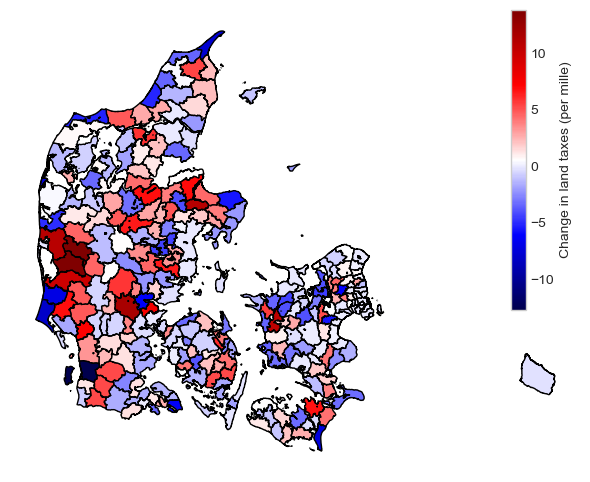

In [20]:
fig, ax = plt.subplots(1, 1)
kommune_2006.plot(column='delta_tax',
           ax=ax,
           cmap='seismic',
           norm=norm,
           legend=True,
           legend_kwds={'label': "Change in land taxes (per mille)",
                        'orientation': "vertical",
                        "shrink":.65,
                        'anchor': (-1, 1)},
            edgecolor='k')
ax.set_axis_off()   
fig.savefig('figs/fig_map_taxes.pdf', bbox_inches = "tight")

# Add variables: 
- real house prices (by house price index)
- real sqm price (by house price index)
- ln of property value (in 2001)

In [21]:
df_merged_index['real_price']=df_merged_index['price']/df_merged_index['house_price_index']
df_merged_index['real_sqmPrice']=df_merged_index['sqmPrice']/df_merged_index['house_price_index']
df_merged_index['ln_prop_value']=np.log(df_merged_index['eval_prop_2001'])
df_merged_index['ln_price']=np.log(df_merged_index['price'])
df_merged_index['ln_real_price']=np.log(df_merged_index['real_price'])
df_merged_index['delta_tax_eff']=(df_merged_index['delta_tax']*df_merged_index['eval_land_2001']/df_merged_index['lot_size'])/1000

Categorize data by changes to land taxes

In [22]:
def land_tax_change07(value):
    if value > 0:
        return "Higher"
    elif value < 0:
        return "Lower"
    else:
        return "Unchanged"
df_merged_index['tax_change_reform'] = df_merged_index.apply(lambda row: land_tax_change07(row['delta_tax']), axis = 1)
df_merged_index['tax_change_reform']=df_merged_index['tax_change_reform'].astype('category')

In [23]:
df_merged_index=df_merged_index[df_merged_index['tax_change_reform']!="Unchanged"]

C:\Users\JBH\AppData\Local\Temp\ipykernel_16116\3834426404.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_agg=df_merged_index.groupby(['year', 'tax_change_reform']).mean()


Text(0, 0.5, 'House prices in 1,000s')

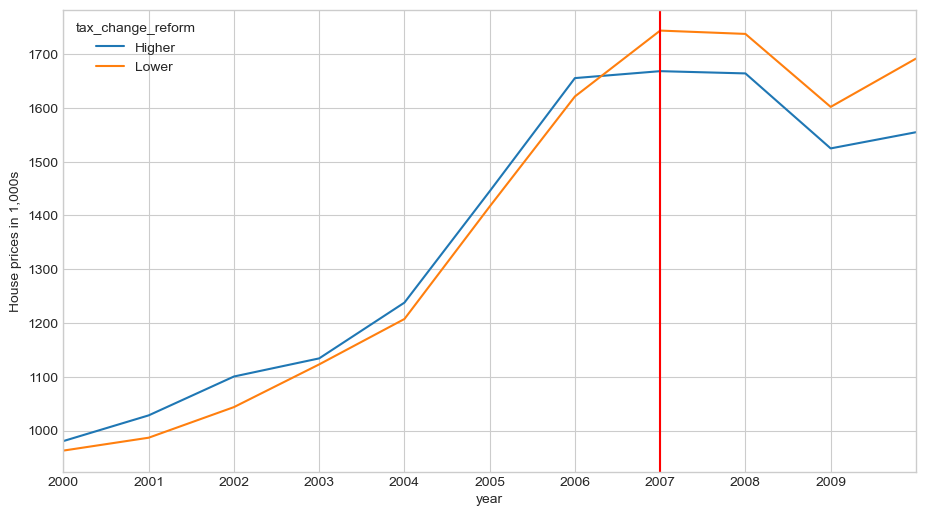

In [24]:
temp_agg=df_merged_index.groupby(['year', 'tax_change_reform']).mean()
temp_agg_high_low = temp_agg.unstack()
plot=temp_agg_high_low['price_1000'][['Higher', 'Lower']].plot()
plot.axvline(x=2007,color='r')
plot.set_xlim(2000, 2010)
plot.set_xticks(np.arange(df_merged_index['year'].min(), df_merged_index['year'].max(), 1))
plt.ylabel('House prices in 1,000s')

In [25]:
stata_out = df_merged_index[['guid','ln_price', 'ln_real_price', 'kommune_old', 'year', 'ln_prop_value', 'delta_tax_eff']]
stata_out

,guid,ln_price,ln_real_price,kommune_old,year,ln_prop_value,delta_tax_eff
0,ca3266d1-c611-4ad0-bda7-0c15789b3544,14.217637,14.716863,Århus Kommune,2000,14.285514,-0.010168
1,ca3266d1-c611-4ad0-bda7-0c15789b3544,14.834358,14.830366,Århus Kommune,2006,14.285514,-0.010168
2,ba260035-a87d-4cf5-83be-e3331aff2f69,14.450891,14.950117,Århus Kommune,2000,14.346139,-0.008884
3,a3512da8-bb3b-40e2-bdd6-1db688c5ff71,14.270718,14.769944,Århus Kommune,2000,14.403297,-0.011528
4,a61c5c9c-50fd-4e79-b8cb-a8d4e8102f3a,13.681979,14.181206,Århus Kommune,2000,13.676248,-0.005715
...,...,...,...,...,...,...,...
482072,887cd307-3d80-4c86-b3b3-6725904bae87,13.887831,13.855364,Læsø Kommune,2010,12.736701,-0.024077
482073,c7bd8ea0-eb6b-45b2-855b-3eb6a751646c,14.220976,14.188508,Læsø Kommune,2010,12.793859,-0.073319
482074,b46dcf2d-b8af-4eb1-96bb-31d5640c8a2e,12.594731,12.562263,Læsø Kommune,2010,12.676076,-0.043081
482075,451ce889-bfcf-45d1-8366-3e707ea7e993,13.118355,13.085888,Læsø Kommune,2010,13.102161,-0.046124


In [26]:
stata_out['kommune_old_id']=stata_out.groupby('kommune_old').ngroup()
stata_out['id']=stata_out.groupby('guid').ngroup()

In [27]:
stata_out.to_stata('data/house.dta')

In [28]:
import statsmodels.formula.api as smf
from toolz import curry

In [29]:
@curry
def demean(df, col_to_demean):
    return df.assign(**{col_to_demean: (df[col_to_demean]
                                        - df.groupby("kommune_old")[col_to_demean].transform("mean")
                                        - df.groupby("year")[col_to_demean].transform("mean"))})

In [30]:
years = [2004, 2005, 2006, 2007, 2008]

for year in years:
    var_name = f'year{year}_delta_tax_eff'
    df_merged_index[var_name]=(df_merged_index['year']==year).astype(int)*df_merged_index['delta_tax_eff']

In [31]:
formula = f"""ln_real_price ~ year2005_delta_tax_eff + year2006_delta_tax_eff + year2007_delta_tax_eff + year2008_delta_tax_eff + ln_prop_value"""
mod = smf.ols(formula,
              data=df_merged_index
              .pipe(demean(col_to_demean="ln_real_price"))
              .pipe(demean(col_to_demean="year2005_delta_tax_eff"))
              .pipe(demean(col_to_demean="year2006_delta_tax_eff"))
              .pipe(demean(col_to_demean="year2007_delta_tax_eff"))
              .pipe(demean(col_to_demean="year2008_delta_tax_eff"))
              .pipe(demean(col_to_demean="ln_prop_value")))
result=mod.fit(cov_type='cluster', cov_kwds={'groups': df_merged_index['kommune_old']})
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ln_real_price   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     936.0
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          1.30e-155
Time:                        14:45:15   Log-Likelihood:            -2.8072e+05
No. Observations:              425792   AIC:                         5.615e+05
Df Residuals:                  425786   BIC:                         5.615e+05
Df Model:                           5                                         
Covariance Type:              cluster                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5.0476      0.133    -38.079      0.000      -5.307      -4.788
year2005_delta_tax_eff    -0.0124      0.007     -1.759      0.079      -0.026       0.001
year2006_delta_tax_eff    -0.0220      0.010     -2.103      0.035      -0.043      -0.001
year2007_delta_tax_eff    -0.0130      0.006     -2.004      0.045      -0.026      -0.000
year2008_delta_tax_eff    -0.0113      0.008     -1.350      0.177      -0.028       0.005
ln_prop_value              0.6638      0.010     68.123      0.000       0.645       0.683
==============================================================================
Omnibus:                   253796.376   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9294089.343
Skew:                          -2.290   Prob(JB):                         0.00
Kurtosis:                      25.425   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

## Conditional quantiles, fixed effects equal across quantiles

In [32]:
mod_quantile_fe_across = smf.quantreg(formula,
              data=df_merged_index
              .pipe(demean(col_to_demean="ln_real_price"))
              .pipe(demean(col_to_demean="year2005_delta_tax_eff"))
              .pipe(demean(col_to_demean="year2006_delta_tax_eff"))
              .pipe(demean(col_to_demean="year2007_delta_tax_eff"))
              .pipe(demean(col_to_demean="year2008_delta_tax_eff"))
              .pipe(demean(col_to_demean="ln_prop_value")))
result_quantile=mod_quantile_fe_across.fit(q=0.5,cov_type='cluster', cov_kwds={'groups': df_merged_index['kommune_old']})
result_quantile.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:          ln_real_price   Pseudo R-squared:               0.3191
Model:                       QuantReg   Bandwidth:                     0.01464
Method:                 Least Squares   Sparsity:                       0.5311
Date:                Fri, 14 Apr 2023   No. Observations:               425792
Time:                        14:45:20   Df Residuals:                   425786
                                        Df Model:                            5
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.2867      0.011   -208.760      0.000      -2.308      -2.265
year2005_delta_tax_eff    -0.0190      0.002    -10.918      0.000      -0.022      -0.016
year2006_delta_tax_eff    -0.0235      0.002    -12.734      0.000      -0.027      -0.020
year2007_delta_tax_eff    -0.0257      0.001    -24.719      0.000      -0.028      -0.024
year2008_delta_tax_eff    -0.0182      0.002     -8.386      0.000      -0.022      -0.014
ln_prop_value              0.8643      0.001   1074.020      0.000       0.863       0.866
==========================================================================================
"""

In [33]:
quantiles = np.arange(0.1, 0.9+0.1, 0.1)


def fit_model(q):
    result_quantile = mod_quantile_fe_across.fit(q=q, cov_type='cluster', cov_kwds={'groups': df_merged_index['kommune_old']})
    return [q, result_quantile.params["Intercept"], result_quantile.params["year2007_delta_tax_eff"]] + result_quantile.conf_int().loc[
        "year2007_delta_tax_eff"
    ].tolist()


models_fe_across = [fit_model(x) for x in quantiles]
models_fe_across = pd.DataFrame(models_fe_across, columns=["q","Intercept", "year2007_delta_tax_eff", "lb", "ub"])

In [34]:
models_fe_across

,q,Intercept,year2007_delta_tax_eff,lb,ub
0,0.1,-3.876421,-0.006264,-0.028751,0.016222
1,0.2,-2.304939,-0.008112,-0.014153,-0.002070
2,0.3,-2.132378,-0.016740,-0.020082,-0.013398
3,0.4,-2.175887,-0.022603,-0.025053,-0.020153
4,0.5,-2.286695,-0.025713,-0.027752,-0.023674
5,0.6,-2.404458,-0.028110,-0.029966,-0.026255
6,0.7,-2.591888,-0.029115,-0.031000,-0.027229
7,0.8,-2.875393,-0.034291,-0.036565,-0.032016
8,0.9,-3.617421,-0.051520,-0.055443,-0.047597


In [42]:
models_fe_across.to_parquet('models/quantiles_fe_across.pq')

## Conditional quantiles, fixed effects within quantiles

In [35]:
formula2 = f'''ln_real_price ~ year2005_delta_tax_eff + year2006_delta_tax_eff + year2007_delta_tax_eff + year2008_delta_tax_eff + ln_prop_value + C(year) + C(kommune_old)'''
formula2

'ln_real_price ~ year2005_delta_tax_eff + year2006_delta_tax_eff + year2007_delta_tax_eff + year2008_delta_tax_eff + ln_prop_value + C(year) + C(kommune_old)'

In [36]:
mod_quantile_fe_within = smf.quantreg(formula2,
              data=df_merged_index)
result_quantile=mod_quantile_fe_within.fit(q=0.5,cov_type='cluster', cov_kwds={'groups': df_merged_index['kommune_old']}, fe=True)
result_quantile.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:          ln_real_price   Pseudo R-squared:               0.5060
Model:                       QuantReg   Bandwidth:                     0.01402
Method:                 Least Squares   Sparsity:                       0.4851
Date:                Fri, 14 Apr 2023   No. Observations:               425792
Time:                        14:48:15   Df Residuals:                   425535
                                        Df Model:                          256
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          2.6546      0.012    222.562      0.000       2.631       2.678
C(year)[T.2001]                                -8.792e-05      0.002     -0.053      0.957      -0.003       0.003
C(year)[T.2002]                                   -0.0021      0.002     -1.287      0.198      -0.005       0.001
C(year)[T.2003]                                    0.0018      0.002      1.074      0.283      -0.001       0.005
C(year)[T.2004]                                   -0.0086      0.002     -5.231      0.000      -0.012      -0.005
C(year)[T.2005]                                   -0.0147      0.002     -9.262      0.000      -0.018      -0.012
C(year)[T.2006]                                   -0.0368      0.002    -22.427      0.000      -0.040      -0.034
C(year)[T.2007]                                   -0.0338      0.002    -20.371      0.000      -0.037      -0.031
C(year)[T.2008]                                   -0.0317      0.002    -17.546      0.000      -0.035      -0.028
C(year)[T.2009]                                   -0.0332      0.002    -17.078      0.000      -0.037      -0.029
C(year)[T.2010]                                   -0.0481      0.002    -25.758      0.000      -0.052      -0.044
C(kommune_old)[T.Assens Kommune]                  -0.5342      0.009    -61.680      0.000      -0.551      -0.517
C(kommune_old)[T.Augustenborg Kommune]            -0.5663      0.010    -57.157      0.000      -0.586      -0.547
C(kommune_old)[T.Aulum-Haderup Kommune]           -0.4630      0.010    -47.829      0.000      -0.482      -0.444
C(kommune_old)[T.Ballerup-Måløv Kommune]           0.0023      0.007      0.311      0.755      -0.012       0.017
C(kommune_old)[T.Billund Kommune]                 -0.5013      0.009    -53.019      0.000      -0.520      -0.483
C(kommune_old)[T.Birkerød Kommune]                 0.0779      0.008      9.864      0.000       0.062       0.093
C(kommune_old)[T.Bjergsted Kommune]               -0.2446      0.009    -27.883      0.000      -0.262      -0.227
C(kommune_old)[T.Bjerringbro Kommune]             -0.4700      0.008    -58.756      0.000      -0.486      -0.454
C(kommune_old)[T.Blåbjerg Kommune]                -0.5628      0.010    -57.988      0.000      -0.582      -0.544
C(kommune_old)[T.Blåvandshuk Kommune]             -0.4541      0.012    -38.494      0.000      -0.477      -0.431
C(kommune_old)[T.Bogense Kommune]                 -0.5098      0.011    -47.932      0.000      -0.531      -0.489
C(kommune_old)[T.Bornholms Regionskommune]        -0.1994      0.006    -31.028      0.000      -0.212      -0.187
C(kommune_old)[T.Bov Kommune]                     -0.5696      0.009    -65.062      0.000      -0.587      -0.552
C(kommune_old)[T.Bramming Kommune]                -0.4974      0.008    -63.638      0.000      -0.513      -0.482
C(kommune_old)[T.Bramsnæs Kommune]                -0.2449      0.009    -26.899      0.000      -0.2

In [37]:
quantiles = np.arange(0.1, 0.9+0.1, 0.1)


def fit_model(q):
    result_quantile = mod_quantile_fe_within.fit(q=q, cov_type='cluster', cov_kwds={'groups': df_merged_index['kommune_old']})
    return [q, result_quantile.params["Intercept"], result_quantile.params["year2007_delta_tax_eff"]] + result_quantile.conf_int().loc[
        "year2007_delta_tax_eff"
    ].tolist()


models_fe_within = [fit_model(x) for x in quantiles]
models_fe_within = pd.DataFrame(models_fe_within, columns=["q","Intercept", "year2007_delta_tax_eff", "lb", "ub"])
models_fe_within

,q,Intercept,year2007_delta_tax_eff,lb,ub
0,0.1,3.645061,-0.006669,-0.022844,0.009507
1,0.2,2.453726,-0.006801,-0.012214,-0.001388
2,0.3,2.287272,-0.015876,-0.018924,-0.012827
3,0.4,2.420242,-0.022956,-0.025250,-0.020662
4,0.5,2.654561,-0.025829,-0.027692,-0.023967
5,0.6,2.908082,-0.028811,-0.030492,-0.027131
6,0.7,3.224490,-0.030126,-0.031792,-0.028460
7,0.8,3.652365,-0.036658,-0.038561,-0.034755
8,0.9,4.500499,-0.050423,-0.053415,-0.047431


In [41]:
models_fe_within.to_parquet('models/quantiles_fe_within.pq')